# CRISP-DM
1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modeling
5. Evaluation
6. Data Presentation

# 1.Business Understanding

We use this dataset to analyze what kinds of reasons can affect employees to leave or not.

# 2.Data Understanding

This dataset includes a lot of information about employees, which could affect employees to
leave or not. However, 'EmployeeCount', 'EmployeeNumber' could not help to analyze attrition,so they need to be dropped. In the meantime, I need to analyze every column in the data to judge which column also could not affect attrition. Then I need to clean missing data or unreasonable data, and last step is to transform the processed data to model.

# 3. Data Preparation

## 3.1 Data Preprocessing

### 3.1.1 Library Import

In [133]:
import numpy as np 
import pandas as pd
pd.set_option('display.max_columns', None)

import seaborn as sns
import matplotlib.pyplot as plt 
import apyori as ap
from apyori import apriori #Apriori Algorithm
import mlxtend as ml
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
from sklearn.preprocessing import MinMaxScaler

### 3.1.2 Data Import

In [134]:
data = pd.read_csv("employee_attrition.csv")

In [135]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,30,No,Travel_Rarely,1358,Sales,16.0,1,Life Sciences,1,1479,4,Male,96,3,2.0,Sales Executive,3,Married,5301,2939,8,Y,No,15.0,3.0,3.0,80,2,4.0,2,2,2,1,2.0,2
1,52,No,Travel_Rarely,1325,Research & Development,11.0,4,Life Sciences,1,813,4,Female,82,3,2.0,Laboratory Technician,3,Married,3149,21821,8,Y,No,20.0,4.0,2.0,80,1,9.0,3,3,5,2,1.0,4
2,42,No,Travel_Rarely,462,Sales,14.0,2,Medical,1,936,3,Female,68,2,2.0,Sales Executive,3,Single,6244,7824,7,Y,No,17.0,3.0,1.0,80,0,10.0,6,3,5,4,0.0,3
3,55,No,Non-Travel,177,Research & Development,8.0,1,Medical,1,1278,4,Male,37,2,4.0,Healthcare Representative,2,Divorced,13577,25592,1,Y,Yes,15.0,3.0,4.0,80,1,34.0,3,3,33,9,15.0,0
4,35,No,Travel_Rarely,1029,Research & Development,16.0,3,Life Sciences,1,1529,4,Female,91,2,3.0,Healthcare Representative,2,Single,8606,21195,1,Y,No,19.0,3.0,4.0,80,0,11.0,3,1,11,8,3.0,3


### 3.1.3 Data Cleaning

In [136]:
data.isnull().any() # Check which column has missing value

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome             True
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                       True
HourlyRate                  False
JobInvolvement              False
JobLevel                     True
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                     True
PercentSalaryHike            True
PerformanceRating            True
RelationshipSatisfaction     True
StandardHours               False
StockOptionLevel            False
TotalWorkingYears            True
TrainingTimesL

In [137]:
data.isnull().sum() # count the missing value in every column

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            2
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      1
HourlyRate                  0
JobInvolvement              0
JobLevel                    1
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    1
PercentSalaryHike           1
PerformanceRating           1
RelationshipSatisfaction    1
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           2
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [138]:
data.isnull().sum().sum()

11

In [139]:
data.columns[data.isnull().any()].tolist() # extract which column has missing value 

['DistanceFromHome',
 'Gender',
 'JobLevel',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'TotalWorkingYears',
 'YearsSinceLastPromotion']

In [140]:
data[data.isnull().values==True] # check the missing values where are

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
9,27,Yes,Travel_Rarely,1420,Sales,2.0,1,Marketing,1,667,3,Male,85,3,1.0,Sales Representative,1,Divorced,3041,16346,0,Y,No,11.0,NaN,2.0,80,1,5.0,3,3,4,3,0.0,2
32,38,No,Non-Travel,573,Research & Development,6.0,3,Medical,1,107,2,Female,79,1,2.0,Research Scientist,4,Divorced,5329,15717,7,Y,Yes,12.0,3.0,NaN,80,3,17.0,3,3,13,11,1.0,9
54,39,No,Travel_Rarely,412,Research & Development,NaN,4,Medical,1,1307,3,Female,94,2,4.0,Manager,2,Divorced,17123,17334,6,Y,Yes,13.0,3.0,4.0,80,2,21.0,4,3,19,9,15.0,2
63,43,No,Travel_Rarely,930,Research & Development,6.0,3,Medical,1,1402,1,Female,73,2,2.0,Research Scientist,3,Single,4081,20003,1,Y,Yes,NaN,3.0,1.0,80,0,20.0,3,1,20,7,1.0,8
82,38,No,Travel_Rarely,362,Research & Development,1.0,1,Life Sciences,1,662,3,Female,43,3,1.0,Research Scientist,1,Single,2619,14561,3,Y,No,17.0,3.0,4.0,80,0,NaN,3,2,0,0,0.0,0
88,28,No,Travel_Rarely,1476,Research & Development,16.0,2,Medical,1,412,2,Male,68,4,NaN,Healthcare Representative,1,Single,5661,4824,0,Y,No,19.0,3.0,3.0,80,0,9.0,2,3,8,3,0.0,7
104,38,No,Travel_Rarely,688,Research & Development,NaN,4,Life Sciences,1,393,4,Male,82,3,2.0,Healthcare Representative,4,Divorced,5745,18899,9,Y,No,14.0,3.0,2.0,80,1,10.0,2,3,2,2,1.0,2
968,39,Yes,Travel_Frequently,203,Research & Development,2.0,3,Life Sciences,1,1127,1,Male,84,3,4.0,Healthcare Representative,4,Divorced,12169,13547,7,Y,No,11.0,3.0,4.0,80,3,NaN,4,3,18,7,11.0,5
993,36,No,Non-Travel,301,Sales,15.0,4,Marketing,1,2036,4,Male,88,1,2.0,Sales Executive,4,Divorced,5406,10436,1,Y,No,24.0,4.0,1.0,80,1,15.0,4,2,15,12,NaN,11
1012,55,No,Travel_Rarely,692,Research & Development,14.0,4,Medical,1,254,3,Male,61,4,5.0,Research Director,2,Single,18722,13339,8,Y,NaN,11.0,3.0,4.0,80,0,36.0,3,3,24,15,2.0,15


In [141]:
data.shape

(1176, 35)

#### 3.1.3.1 DistanceFromHome clean

In [238]:
data["DistanceFromHome"].unique() # check what kinds of value does 'DistanceFromHome' have

array([16.        , 11.        , 14.        ,  8.        , 26.        ,
        1.        , 20.        ,  6.        ,  2.        , 10.        ,
       24.        ,  5.        ,  7.        ,  3.        , 27.        ,
        4.        , 25.        , 12.        , 28.        , 18.        ,
       17.        ,  9.        , 29.        ,  9.50212584, 21.        ,
       13.        , 22.        , 23.        ,  9.49574106,  9.50298634,
       15.        , 19.        ])

In [235]:
data[data["DistanceFromHome"] == 224] # we can see there is a 224 in 'distancefromHome', it is obviously unreasonable

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_grp,DailyRate_grp,DistanceFromHome_grp,Education_grp,EnvironmentSatisfaction_grp,HourlyRate_grp,JobInvolvement_grp,JobLevel_grp,JobSatisfaction_grp,MonthlyIncome_grp,MonthlyRate_grp,NumCompaniesWorked_grp,PercentSalaryHike_grp,RelationshipSatisfaction_grp,StockOptionLevel _grp,TotalWorkingYears_grp,TrainingTimesLastYear_grp,WorkLifeBalance_grp,YearsAtCompany_grp,YearsInCurrentRole_grp,YearsSinceLastPromotion_grp,YearsWithCurrManager_grp
126,31,No,Travel_Rarely,1062,Research & Development,224.0,3,Medical,1,1252,3,Female,96,2,2.0,Healthcare Representative,1,Single,6812,17198,1,Y,No,19.0,3.0,2.0,80,0,10.0,2,3,10,9,1.0,8.0,Low_Age,High_DailyRate,High_Dis,Med_Edu,Med_EnvironmentSatisfaction,High_HourlyRate,Low_JobInvolvement,Low_JobLevel,Low_JobSatisfaction,Low_MonthlyIncome,Med_MonthlyRate,Low_NumCompaniesWorked,Med_PercentSalaryHike,Low_RelationshipSatisfaction,Low_StockOptionLevel,Low_TotalWorkingYears,Low_TrainingTimesLastYear,Med_WorkLifeBalance,High_YearsAtCompany,High_YearsInCurrentRole,Low_YearsSinceLastPromotion,High_YearsWithCurrManager


In [236]:
data["DistanceFromHome"].iloc[124:125] = data["DistanceFromHome"].mean()

/Users/mark/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [237]:
data["DistanceFromHome"].fillna(data["DistanceFromHome"].mean(), inplace = True)

#### 3.1.3.2 Gender clean

In [146]:
data[data["Gender"].isna().values == True ] # check missing value in 'gender'

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1061,56,No,Travel_Frequently,906,Sales,6.0,3,Life Sciences,1,532,3,NaN,86,4,4.0,Sales Executive,1,Married,13212,18256,9,Y,No,11.0,3.0,4.0,80,3,36.0,0,2,7,7,7.0,7


#### 3.1.3.3 JobLevel clean

In [147]:
data[data["JobLevel"].isna().values == True ] # check missing value in 'JobLevel'

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
88,28,No,Travel_Rarely,1476,Research & Development,16.0,2,Medical,1,412,2,Male,68,4,NaN,Healthcare Representative,1,Single,5661,4824,0,Y,No,19.0,3.0,3.0,80,0,9.0,2,3,8,3,0.0,7


#### 3.1.3.4 OverTime cleaning

In [148]:
data[data["OverTime"].isna().values == True] # check missing value in 'OverTime'

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1012,55,No,Travel_Rarely,692,Research & Development,14.0,4,Medical,1,254,3,Male,61,4,5.0,Research Director,2,Single,18722,13339,8,Y,NaN,11.0,3.0,4.0,80,0,36.0,3,3,24,15,2.0,15


#### 3.1.3.5 PercentSalaryHike Cleaning

In [149]:
data[data["PercentSalaryHike"].isna().values == True] # check missing value in 'PercentSalaryHike'

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
63,43,No,Travel_Rarely,930,Research & Development,6.0,3,Medical,1,1402,1,Female,73,2,2.0,Research Scientist,3,Single,4081,20003,1,Y,Yes,NaN,3.0,1.0,80,0,20.0,3,1,20,7,1.0,8


In [150]:
data["PercentSalaryHike"].fillna(data["PercentSalaryHike"].mean(), inplace = True) # give the missing value a mean of 'PercentSalaryHike'

#### 3.1.3.6 PerformanceRating Cleaning 

In [151]:
data[data["PerformanceRating"].isna().values == True] # check missing value in 'PerformanceRating'

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
9,27,Yes,Travel_Rarely,1420,Sales,2.0,1,Marketing,1,667,3,Male,85,3,1.0,Sales Representative,1,Divorced,3041,16346,0,Y,No,11.0,NaN,2.0,80,1,5.0,3,3,4,3,0.0,2


In [152]:
data["PerformanceRating"].fillna(data["PerformanceRating"].mean(), inplace = True) # give the missing value a mean of 'PerformanceRating'

#### 3.1.3.7 RelationshipSatisfaction Cleaning

In [153]:
data[data["RelationshipSatisfaction"].isna().values == True] # check missing value in 'RelationshipSatisfaction'

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
32,38,No,Non-Travel,573,Research & Development,6.0,3,Medical,1,107,2,Female,79,1,2.0,Research Scientist,4,Divorced,5329,15717,7,Y,Yes,12.0,3.0,NaN,80,3,17.0,3,3,13,11,1.0,9


In [154]:
data["RelationshipSatisfaction"].fillna(data["RelationshipSatisfaction"].mean(), inplace = True)
# give the missing value a mean of 'RelationshipSatisfaction'

#### 3.1.3.8 TotalWorkingYears  Cleaning

In [155]:
data[data["TotalWorkingYears"].isna().values == True] # check missing value in 'TotalWorkingYears'


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
82,38,No,Travel_Rarely,362,Research & Development,1.0,1,Life Sciences,1,662,3,Female,43,3,1.0,Research Scientist,1,Single,2619,14561,3,Y,No,17.0,3.0,4.0,80,0,NaN,3,2,0,0,0.0,0
968,39,Yes,Travel_Frequently,203,Research & Development,2.0,3,Life Sciences,1,1127,1,Male,84,3,4.0,Healthcare Representative,4,Divorced,12169,13547,7,Y,No,11.0,3.0,4.0,80,3,NaN,4,3,18,7,11.0,5


In [245]:
data["TotalWorkingYears"].unique()

array([ 4.,  9., 10., 34., 11., 29.,  8.,  5., 21.,  6., 14.,  1., 15.,
        3., 12., 20., 17., 23.,  2., 35., 36., 13., 31., 25.,  7., 28.,
       24., 19., 26., 16., 40., 32., 38., 18.,  0., 33., 27., 22., 30.,
       37.])

In [241]:
data[data["TotalWorkingYears"] == 114]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_grp,DailyRate_grp,DistanceFromHome_grp,Education_grp,EnvironmentSatisfaction_grp,HourlyRate_grp,JobInvolvement_grp,JobLevel_grp,JobSatisfaction_grp,MonthlyIncome_grp,MonthlyRate_grp,NumCompaniesWorked_grp,PercentSalaryHike_grp,RelationshipSatisfaction_grp,StockOptionLevel _grp,TotalWorkingYears_grp,TrainingTimesLastYear_grp,WorkLifeBalance_grp,YearsAtCompany_grp,YearsInCurrentRole_grp,YearsSinceLastPromotion_grp,YearsWithCurrManager_grp
143,36,No,Travel_Frequently,541,Sales,3.0,4,Medical,1,481,1,Male,48,2,3.0,Sales Executive,4,Married,9699,7246,4,Y,No,11.0,3.0,1.0,80,1,114.0,2,3,13,9,1.0,12.0,Med_Age,Low_DailyRate,Low_Dis,High_Edu,Low_EnvironmentSatisfaction,Low_HourlyRate,Low_JobInvolvement,Med_JobLevel,High_JobSatisfaction,Med_MonthlyIncome,Low_MonthlyRate,Med_NumCompaniesWorked,Low_PercentSalaryHike,Low_RelationshipSatisfaction,Low_StockOptionLevel,High_TotalWorkingYears,Low_TrainingTimesLastYear,Med_WorkLifeBalance,High_YearsAtCompany,High_YearsInCurrentRole,Low_YearsSinceLastPromotion,High_YearsWithCurrManager


In [244]:
data["TotalWorkingYears"].iloc[141:142] = int(data["TotalWorkingYears"].mean())

/Users/mark/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [156]:
data["TotalWorkingYears"].iloc[968:969] = data["YearsAtCompany"].iloc[968:969]
# locate 'TotalWorkingYears' to give the same value with 'YearsAtCompany'

#### 3.1.3.9 YearsSinceLastPromotion Cleaning

In [157]:
data[data["YearsSinceLastPromotion"].isna().values == True] 
# check missing value in 'YearsSinceLastPromotion'

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
993,36,No,Non-Travel,301,Sales,15.0,4,Marketing,1,2036,4,Male,88,1,2.0,Sales Executive,4,Divorced,5406,10436,1,Y,No,24.0,4.0,1.0,80,1,15.0,4,2,15,12,NaN,11


In [158]:
data["YearsSinceLastPromotion"].iloc[993:994] = data["YearsInCurrentRole"].iloc[993:994]
# locate 'YearsSinceLastPromotion' to give the same value with 'YearsInCurrentRole'

#### 3.1.3.10 YearsWithCurrManager Cleaning

In [231]:
data.YearsWithCurrManager.unique()

array([ 2.,  4.,  3.,  0., 17., 12., 10.,  9.,  1.,  7.,  8.,  6., 13.,
       16.,  5., 11., 15., 14.])

In [228]:
data[data["YearsWithCurrManager"] == 219]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_grp,DailyRate_grp,DistanceFromHome_grp,Education_grp,EnvironmentSatisfaction_grp,HourlyRate_grp,JobInvolvement_grp,JobLevel_grp,JobSatisfaction_grp,MonthlyIncome_grp,MonthlyRate_grp,NumCompaniesWorked_grp,PercentSalaryHike_grp,RelationshipSatisfaction_grp,StockOptionLevel _grp,TotalWorkingYears_grp,TrainingTimesLastYear_grp,WorkLifeBalance_grp,YearsAtCompany_grp,YearsInCurrentRole_grp,YearsSinceLastPromotion_grp,YearsWithCurrManager_grp


In [230]:
data["YearsWithCurrManager"].iloc[1051:1052] = int(data["YearsWithCurrManager"].mean()) 

In [159]:
data = data.dropna() # drop all missing value in the rest dataset

In [160]:
data.isnull().sum().sum() # calculate how many missing value still are in the dataset

0

In [161]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,30,No,Travel_Rarely,1358,Sales,16.0,1,Life Sciences,1,1479,4,Male,96,3,2.0,Sales Executive,3,Married,5301,2939,8,Y,No,15.0,3.0,3.0,80,2,4.0,2,2,2,1,2.0,2
1,52,No,Travel_Rarely,1325,Research & Development,11.0,4,Life Sciences,1,813,4,Female,82,3,2.0,Laboratory Technician,3,Married,3149,21821,8,Y,No,20.0,4.0,2.0,80,1,9.0,3,3,5,2,1.0,4
2,42,No,Travel_Rarely,462,Sales,14.0,2,Medical,1,936,3,Female,68,2,2.0,Sales Executive,3,Single,6244,7824,7,Y,No,17.0,3.0,1.0,80,0,10.0,6,3,5,4,0.0,3
3,55,No,Non-Travel,177,Research & Development,8.0,1,Medical,1,1278,4,Male,37,2,4.0,Healthcare Representative,2,Divorced,13577,25592,1,Y,Yes,15.0,3.0,4.0,80,1,34.0,3,3,33,9,15.0,0
4,35,No,Travel_Rarely,1029,Research & Development,16.0,3,Life Sciences,1,1529,4,Female,91,2,3.0,Healthcare Representative,2,Single,8606,21195,1,Y,No,19.0,3.0,4.0,80,0,11.0,3,1,11,8,3.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,28,No,Travel_Rarely,1169,Human Resources,8.0,2,Medical,1,869,2,Male,63,2,1.0,Human Resources,4,Divorced,4936,23965,1,Y,No,13.0,3.0,4.0,80,1,6.0,6,3,5,1,0.0,4
1172,36,No,Travel_Rarely,430,Research & Development,2.0,4,Other,1,1847,4,Female,73,3,2.0,Research Scientist,2,Married,6962,19573,4,Y,Yes,22.0,4.0,4.0,80,1,15.0,2,3,1,0,0.0,0
1173,51,No,Travel_Rarely,432,Research & Development,9.0,4,Life Sciences,1,116,4,Male,96,3,1.0,Laboratory Technician,4,Married,2075,18725,3,Y,No,23.0,4.0,2.0,80,2,10.0,4,3,4,2,0.0,3
1174,38,No,Travel_Rarely,437,Sales,16.0,3,Life Sciences,1,1583,2,Female,90,3,2.0,Sales Executive,2,Single,4198,16379,2,Y,No,12.0,3.0,2.0,80,0,8.0,5,4,3,2,1.0,2


#### Analysis
There are 11 missing value in this dataset, so first, I need to drop or fill missing value.
In order that I have enough data to train data model, so I would try to keep data by analysis because there are only 1176 records of employees.

In "DistanceFromHome", "PercentSalaryHike", "RelationshipSatisfaction", they could be filled by mean of them, because they could be thought as mean, in this way, they would not affect model. As for "TotalWorkingYears", I thought this company could be their first company, so the missing value of "TotalWorkingYears" equal to their working years in this ompany, and also I thought "YearsSinceLastPromotion" could equal to their "YearsInCurrentRole". 

I checked "DistanceFromHome" and found there was a value which is unreasonable, it is almost impossible that a person would drive 224 miles to commute, so I give it a mean if "DistanceFromHome" in order to make sure that the interpretation of model could work.


### 3.1.4 Data Normalization

In [162]:
data_scale = data.select_dtypes(include=['int64', 'float64']) # extract data whose type is about number
data_scale.columns # check columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [163]:
def regularit(df): # scale this new data to a new dataframe
    newDataFrame = pd.DataFrame(index=df.index)
    columns = df.columns.tolist()
    for c in columns:
        d = df[c]
        MAX = d.max()
        MIN = d.min()
        newDataFrame[c] = ((d - MIN) / (MAX - MIN)).tolist()
    return newDataFrame

In [164]:
regularit(data_scale)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.285714,0.899069,0.067265,0.00,NaN,0.715046,1.000000,0.942857,0.666667,0.25,0.666667,0.226324,0.033929,0.888889,0.285714,0.0,0.666667,NaN,0.666667,0.035088,0.333333,0.333333,0.050,0.055556,0.133333,0.009132
1,0.809524,0.875447,0.044843,0.75,NaN,0.392840,1.000000,0.742857,0.666667,0.25,0.666667,0.112845,0.792090,0.888889,0.642857,1.0,0.333333,NaN,0.333333,0.078947,0.500000,0.666667,0.125,0.111111,0.066667,0.018265
2,0.571429,0.257695,0.058296,0.25,NaN,0.452346,0.666667,0.542857,0.333333,0.25,0.666667,0.276049,0.230074,0.777778,0.428571,0.0,0.000000,NaN,0.000000,0.087719,1.000000,0.666667,0.125,0.222222,0.000000,0.013699
3,0.880952,0.053686,0.031390,0.00,NaN,0.617804,1.000000,0.100000,0.333333,0.75,0.333333,0.662729,0.943505,0.111111,0.285714,0.0,1.000000,NaN,0.333333,0.298246,0.500000,0.666667,0.825,0.500000,1.000000,0.000000
4,0.404762,0.663565,0.067265,0.50,NaN,0.739236,1.000000,0.871429,0.333333,0.50,0.333333,0.400601,0.766954,0.111111,0.571429,0.0,1.000000,NaN,0.000000,0.096491,0.500000,0.000000,0.275,0.444444,0.200000,0.013699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,0.238095,0.763780,0.031390,0.25,NaN,0.419932,0.333333,0.471429,0.333333,0.00,1.000000,0.207077,0.878177,0.111111,0.142857,0.0,1.000000,NaN,0.333333,0.052632,1.000000,0.666667,0.125,0.055556,0.000000,0.018265
1172,0.428571,0.234789,0.004484,0.75,NaN,0.893082,1.000000,0.614286,0.666667,0.25,0.333333,0.313911,0.701827,0.444444,0.785714,1.0,1.000000,NaN,0.333333,0.131579,0.333333,0.666667,0.025,0.000000,0.000000,0.000000
1173,0.785714,0.236220,0.035874,0.75,NaN,0.055636,1.000000,0.942857,0.666667,0.00,1.000000,0.056212,0.667778,0.333333,0.857143,1.0,0.333333,NaN,0.666667,0.087719,0.666667,0.666667,0.100,0.111111,0.000000,0.013699
1174,0.476190,0.239800,0.067265,0.50,NaN,0.765360,0.333333,0.857143,0.666667,0.25,0.333333,0.168161,0.573580,0.222222,0.071429,0.0,0.333333,NaN,0.000000,0.070175,0.833333,1.000000,0.075,0.111111,0.066667,0.009132


In [255]:
def MaxMinNormalization(x,Max,Min):
    x = (x - Min) / (Max - Min);
    return x

In [256]:
PerformanceRating_scale = MaxMinNormalization(data_scale.PerformanceRating,data_scale.PerformanceRating.max(),data_scale.PerformanceRating.min())

In [257]:
PerformanceRating_scale

0       0.0
1       1.0
2       0.0
3       0.0
4       0.0
       ... 
1171    0.0
1172    1.0
1173    1.0
1174    0.0
1175    0.0
Name: PerformanceRating, Length: 1172, dtype: float64

In [167]:
count = 0
for i in PerformanceRating_scale:
    if i == 0:
        count +=1
print(count)

980


In [168]:
data.PerformanceRating.max()

4.0

In [169]:
data.PerformanceRating.min()

3.0

In [170]:
RelationshipSatisfaction_scale = MaxMinNormalization(data_scale.RelationshipSatisfaction,data_scale.RelationshipSatisfaction.max(),data_scale.RelationshipSatisfaction.min())

In [171]:
count = 0
for i in RelationshipSatisfaction_scale:
    if i == 0:
        count +=1
print(count)

220


In [172]:
data.RelationshipSatisfaction.max()

4.0

In [173]:
data.RelationshipSatisfaction.min()

1.0

In [174]:
YearsSinceLastPromotion_scale = MaxMinNormalization(data_scale.YearsSinceLastPromotion,data_scale.YearsSinceLastPromotion.max(),data_scale.YearsSinceLastPromotion.min())

In [175]:
count = 0
for i in YearsSinceLastPromotion_scale:
    if i == 0:
        count +=1
print(count)

470


In [176]:
data.YearsSinceLastPromotion.max()

15.0

In [177]:
data.YearsSinceLastPromotion.min()

0.0

#### Analysis
When I scaled all of number data, I found there were 3 columns which have a lot of 0, such as "PerformanceRating", "RelationshipSatisfaction", "YearsSinceLastPromotion". "PerformanceRating" have 980 times about 0, "RelationshipSatisfaction" have 220 times about 0, "YearsSinceLastPromotion" have 470 times about, and the dataset only has 1176 records, besides "PerformanceRating" only have 3 or 4 value, so "PerformanceRating" won't affect model too much by normalization analysis.

## 3.2 Data Transformation

In [178]:
# transform the number data into 3 classfied value

In [179]:
data["Age_grp"] = pd.qcut(data.Age, 3, labels=['Low_Age','Med_Age','High_Age'])
data["DailyRate_grp"] = pd.qcut(data.DailyRate, 3, labels=['Low_DailyRate','Med_DailyRate','High_DailyRate'])
data["DistanceFromHome_grp"] = pd.qcut(data.DistanceFromHome, 3, labels=['Low_Dis','Med_Dis','High_Dis'])
data["Education_grp"] = pd.cut(data.Education, 3, labels=['Low_Edu','Med_Edu','High_Edu'])
data["EnvironmentSatisfaction_grp"] = pd.cut(data.EnvironmentSatisfaction, 3, labels=['Low_EnvironmentSatisfaction','Med_EnvironmentSatisfaction','High_EnvironmentSatisfaction'])
data["HourlyRate_grp"] = pd.cut(data.HourlyRate , 3, labels=['Low_HourlyRate','Med_HourlyRate','High_HourlyRate'])
data["JobInvolvement_grp"] = pd.cut(data.JobInvolvement, 3, labels=['Low_JobInvolvement','Med_JobInvolvement','High_JobInvolvement'])
data["JobLevel_grp"] = pd.cut(data.JobLevel, 3, labels=['Low_JobLevel','Med_JobLevel','High_JobLevel'])
data["JobSatisfaction_grp"] = pd.cut(data.JobSatisfaction, 3, labels=['Low_JobSatisfaction','Med_JobSatisfaction','High_JobSatisfaction'])
data["MonthlyIncome_grp"] = pd.cut(data.MonthlyIncome, 3, labels=['Low_MonthlyIncome','Med_MonthlyIncome','High_MonthlyIncome'])
data["MonthlyRate_grp"] = pd.cut(data.MonthlyRate, 3, labels=['Low_MonthlyRate','Med_MonthlyRate','High_MonthlyRate'])
data["NumCompaniesWorked_grp"] = pd.cut(data.NumCompaniesWorked, 3, labels=['Low_NumCompaniesWorked','Med_NumCompaniesWorked','High_JNumCompaniesWorked'])
data["PercentSalaryHike_grp"] = pd.cut(data.PercentSalaryHike, 3, labels=['Low_PercentSalaryHike','Med_PercentSalaryHike','High_PercentSalaryHike'])
data["RelationshipSatisfaction_grp"] = pd.cut(data.RelationshipSatisfaction, 3, labels=['Low_RelationshipSatisfaction','Med_RelationshipSatisfaction','High_RelationshipSatisfaction'])
data["StockOptionLevel _grp"] = pd.cut(data.StockOptionLevel , 3, labels=['Low_StockOptionLevel','Med_StockOptionLevel','High_StockOptionLevel'])
data["TotalWorkingYears_grp"] = pd.cut(data.TotalWorkingYears, 3, labels=['Low_TotalWorkingYears','Med_TotalWorkingYears','High_TotalWorkingYears'])
data["TrainingTimesLastYear_grp"] = pd.qcut(data.TrainingTimesLastYear, 3, labels=['Low_TrainingTimesLastYear','Med_TrainingTimesLastYear','High_TrainingTimesLastYear'])
data["WorkLifeBalance_grp"] = pd.cut(data.WorkLifeBalance, 3, labels=['Low_WorkLifeBalance','Med_WorkLifeBalance','High_WorkLifeBalance'])
data["YearsAtCompany_grp"] = pd.qcut(data.YearsAtCompany, 3, labels=['Low_YearsAtCompany','Med_YearsAtCompany','High_YearsAtCompany'])
data["YearsInCurrentRole_grp"] = pd.qcut(data.YearsInCurrentRole, 3, labels=['Low_YearsInCurrentRole','Med_YearsInCurrentRole','High_YearsInCurrentRole'])
data["YearsSinceLastPromotion_grp"] = pd.cut(data.YearsSinceLastPromotion, 3, labels=['Low_YearsSinceLastPromotion','Med_YearsSinceLastPromotion','High_YearsSinceLastPromotion'])
data["YearsWithCurrManager_grp"] = pd.qcut(data.YearsWithCurrManager, 3, labels=['Low_YearsWithCurrManager','Med_YearsWithCurrManager','High_YearsWithCurrManager'])

#### Analysis
I cut those number data into 3 classified data so that I can use asssociation rule to analyze what kinds of reasons would affect model.

## 3.3 Exploratory Data Analysis

### 3.3.1 Derive Descriptive Statistics

In [180]:
data.describe() # Generate descriptive statistics.

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1172.000000,1172.000000,1172.000000,1172.000000,1172.0,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.0,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000
mean,36.935154,800.186860,9.502986,2.896758,1.0,1038.380546,2.704778,65.826792,2.737201,2.065700,2.715017,6513.493174,14473.568259,2.701365,15.298034,3.163108,2.714777,80.0,0.796075,11.368601,2.812287,2.748294,6.908703,4.144198,2.133106,4.232082
std,9.051191,404.691885,10.251668,1.025094,0.0,600.711770,1.095700,20.306571,0.717631,1.105819,1.111548,4696.519715,7113.267063,2.467462,3.697460,0.369465,1.083505,0.0,0.845070,8.315962,1.307112,0.691998,6.093719,3.489967,3.196288,7.213878
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,461.750000,2.000000,2.000000,1.0,500.750000,2.000000,48.000000,2.000000,1.000000,2.000000,2954.500000,8275.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,796.000000,7.000000,3.000000,1.0,1036.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4941.000000,14488.000000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1162.000000,14.000000,4.000000,1.0,1577.000000,4.000000,83.000000,3.000000,3.000000,4.000000,8327.250000,20659.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000
max,60.000000,1499.000000,224.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19973.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,114.000000,6.000000,4.000000,40.000000,18.000000,15.000000,219.000000


In [181]:
data.info() # Print a concise summary of this dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1172 entries, 0 to 1175
Data columns (total 57 columns):
Age                             1172 non-null int64
Attrition                       1172 non-null object
BusinessTravel                  1172 non-null object
DailyRate                       1172 non-null int64
Department                      1172 non-null object
DistanceFromHome                1172 non-null float64
Education                       1172 non-null int64
EducationField                  1172 non-null object
EmployeeCount                   1172 non-null int64
EmployeeNumber                  1172 non-null int64
EnvironmentSatisfaction         1172 non-null int64
Gender                          1172 non-null object
HourlyRate                      1172 non-null int64
JobInvolvement                  1172 non-null int64
JobLevel                        1172 non-null float64
JobRole                         1172 non-null object
JobSatisfaction                 1172 non-null int64

In [182]:
data.BusinessTravel.unique() # check what kinds of value does 'BusinessTravel' have

array(['Travel_Rarely', 'Non-Travel', 'Travel_Frequently'], dtype=object)

In [183]:
data.Department.unique() # check what kinds of value does 'Department' have

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [184]:
data.EducationField.unique() # check what kinds of value does 'EducationField' have

array(['Life Sciences', 'Medical', 'Marketing', 'Other',
       'Human Resources', 'Technical Degree'], dtype=object)

In [185]:
data.Gender.unique() # check what kinds of value does 'Gender' have

array(['Male', 'Female'], dtype=object)

In [186]:
data.JobRole.unique() # check what kinds of value does 'JobRole' have

array(['Sales Executive', 'Laboratory Technician',
       'Healthcare Representative', 'Manager', 'Manufacturing Director',
       'Sales Representative', 'Human Resources', 'Research Scientist',
       'Research Director'], dtype=object)

In [187]:
data.MaritalStatus.unique() # check what kinds of value does 'MaritalStatus' have

array(['Married', 'Single', 'Divorced'], dtype=object)

In [188]:
data.Over18.unique() # check what kinds of value does 'Over18' have

array(['Y'], dtype=object)

In [189]:
data.OverTime.unique() # check what kinds of value does 'OverTime' have

array(['No', 'Yes'], dtype=object)

#### Analysis
By derive descriptive statistics, I can see all data have already been cleaned and what data still I have in this dataset. I also know what kinds of value in each column. For example, all of employees are over 18, so "Over18" could not help to build model.

### 3.3.2 Data Visualization

In [190]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_grp,DailyRate_grp,DistanceFromHome_grp,Education_grp,EnvironmentSatisfaction_grp,HourlyRate_grp,JobInvolvement_grp,JobLevel_grp,JobSatisfaction_grp,MonthlyIncome_grp,MonthlyRate_grp,NumCompaniesWorked_grp,PercentSalaryHike_grp,RelationshipSatisfaction_grp,StockOptionLevel _grp,TotalWorkingYears_grp,TrainingTimesLastYear_grp,WorkLifeBalance_grp,YearsAtCompany_grp,YearsInCurrentRole_grp,YearsSinceLastPromotion_grp,YearsWithCurrManager_grp
0,30,No,Travel_Rarely,1358,Sales,16.0,1,Life Sciences,1,1479,4,Male,96,3,2.0,Sales Executive,3,Married,5301,2939,8,Y,No,15.0,3.0,3.0,80,2,4.0,2,2,2,1,2.0,2,Low_Age,High_DailyRate,High_Dis,Low_Edu,High_EnvironmentSatisfaction,High_HourlyRate,Med_JobInvolvement,Low_JobLevel,Med_JobSatisfaction,Low_MonthlyIncome,Low_MonthlyRate,High_JNumCompaniesWorked,Low_PercentSalaryHike,Med_RelationshipSatisfaction,Med_StockOptionLevel,Low_TotalWorkingYears,Low_TrainingTimesLastYear,Low_WorkLifeBalance,Low_YearsAtCompany,Low_YearsInCurrentRole,Low_YearsSinceLastPromotion,Low_YearsWithCurrManager
1,52,No,Travel_Rarely,1325,Research & Development,11.0,4,Life Sciences,1,813,4,Female,82,3,2.0,Laboratory Technician,3,Married,3149,21821,8,Y,No,20.0,4.0,2.0,80,1,9.0,3,3,5,2,1.0,4,High_Age,High_DailyRate,High_Dis,High_Edu,High_EnvironmentSatisfaction,High_HourlyRate,Med_JobInvolvement,Low_JobLevel,Med_JobSatisfaction,Low_MonthlyIncome,High_MonthlyRate,High_JNumCompaniesWorked,Med_PercentSalaryHike,Low_RelationshipSatisfaction,Low_StockOptionLevel,Low_TotalWorkingYears,Med_TrainingTimesLastYear,Med_WorkLifeBalance,Med_YearsAtCompany,Low_YearsInCurrentRole,Low_YearsSinceLastPromotion,Med_YearsWithCurrManager
2,42,No,Travel_Rarely,462,Sales,14.0,2,Medical,1,936,3,Female,68,2,2.0,Sales Executive,3,Single,6244,7824,7,Y,No,17.0,3.0,1.0,80,0,10.0,6,3,5,4,0.0,3,High_Age,Low_DailyRate,High_Dis,Low_Edu,Med_EnvironmentSatisfaction,Med_HourlyRate,Low_JobInvolvement,Low_JobLevel,Med_JobSatisfaction,Low_MonthlyIncome,Low_MonthlyRate,High_JNumCompaniesWorked,Med_PercentSalaryHike,Low_RelationshipSatisfaction,Low_StockOptionLevel,Low_TotalWorkingYears,High_TrainingTimesLastYear,Med_WorkLifeBalance,Med_YearsAtCompany,Med_YearsInCurrentRole,Low_YearsSinceLastPromotion,Med_YearsWithCurrManager
3,55,No,Non-Travel,177,Research & Development,8.0,1,Medical,1,1278,4,Male,37,2,4.0,Healthcare Representative,2,Divorced,13577,25592,1,Y,Yes,15.0,3.0,4.0,80,1,34.0,3,3,33,9,15.0,0,High_Age,Low_DailyRate,Med_Dis,Low_Edu,High_EnvironmentSatisfaction,Low_HourlyRate,Low_JobInvolvement,High_JobLevel,Low_JobSatisfaction,Med_MonthlyIncome,High_MonthlyRate,Low_NumCompaniesWorked,Low_PercentSalaryHike,High_RelationshipSatisfaction,Low_StockOptionLevel,Low_TotalWorkingYears,Med_TrainingTimesLastYear,Med_WorkLifeBalance,High_YearsAtCompany,High_YearsInCurrentRole,High_YearsSinceLastPromotion,Low_YearsWithCurrManager
4,35,No,Travel_Rarely,1029,Research & Development,16.0,3,Life Sciences,1,1529,4,Female,91,2,3.0,Healthcare Representative,2,Single,8606,21195,1,Y,No,19.0,3.0,4.0,80,0,11.0,3,1,11,8,3.0,3,Med_Age,Med_DailyRate,High_Dis,Med_Edu,High_EnvironmentSatisfaction,High_HourlyRate,Low_JobInvolvement,Med_JobLevel,Low_JobSatisfaction,Med_MonthlyIncome,High_MonthlyRate,Low_NumCompaniesWorked,Med_PercentSalaryHike,High_RelationshipSatisfaction,Low_StockOptionLevel,Low_TotalWorkingYears,Med_TrainingTimesLastYear,Low_WorkLifeBalance,High_YearsAtCompany,High_YearsInCurrentRole,Low_YearsSinceLastPromotion,Med_YearsWithCurrManager


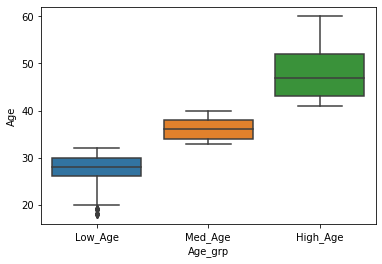

In [191]:
sns.boxplot(x='Age_grp',y='Age',data=data)

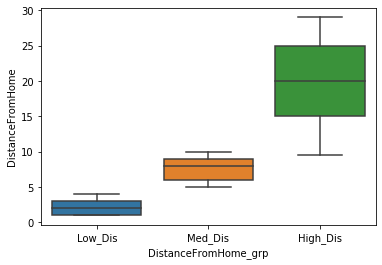

In [239]:
sns.boxplot(x='DistanceFromHome_grp',y='DistanceFromHome',data=data)

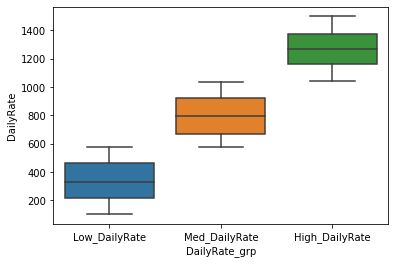

In [195]:
sns.boxplot(x='DailyRate_grp',y='DailyRate',data=data)

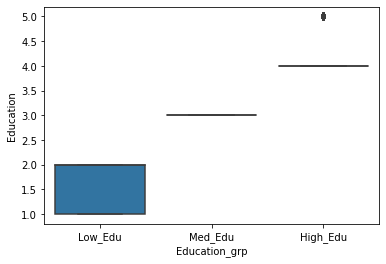

In [194]:
sns.boxplot(x='Education_grp',y='Education',data=data)

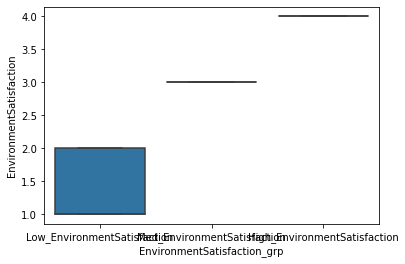

In [196]:
sns.boxplot(x='EnvironmentSatisfaction_grp',y='EnvironmentSatisfaction',data=data)

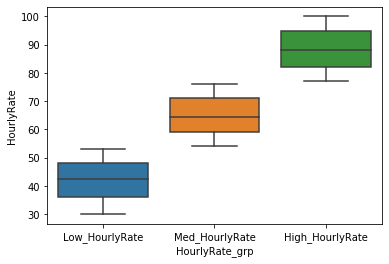

In [197]:
sns.boxplot(x='HourlyRate_grp',y='HourlyRate',data=data)

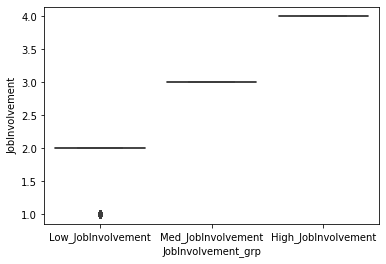

In [198]:
sns.boxplot(x='JobInvolvement_grp',y='JobInvolvement',data=data)

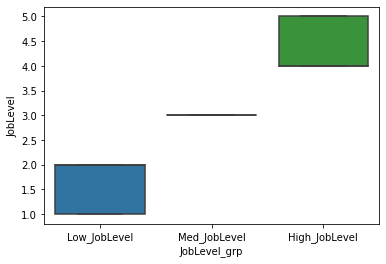

In [199]:
sns.boxplot(x='JobLevel_grp',y='JobLevel',data=data)

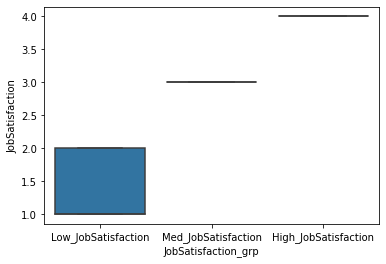

In [200]:
sns.boxplot(x='JobSatisfaction_grp',y='JobSatisfaction',data=data)

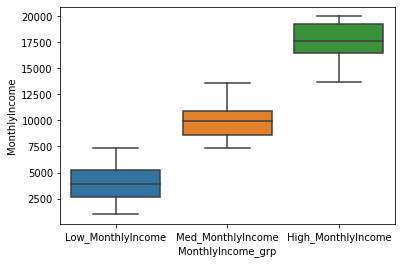

In [201]:
sns.boxplot(x='MonthlyIncome_grp',y='MonthlyIncome',data=data)

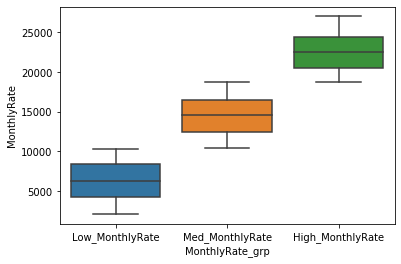

In [202]:
sns.boxplot(x='MonthlyRate_grp',y='MonthlyRate',data=data)

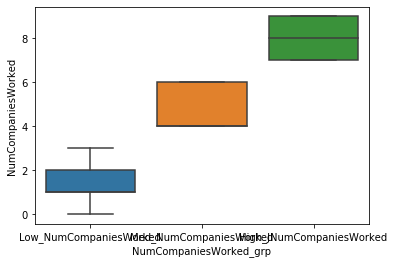

In [203]:
sns.boxplot(x='NumCompaniesWorked_grp',y='NumCompaniesWorked',data=data)

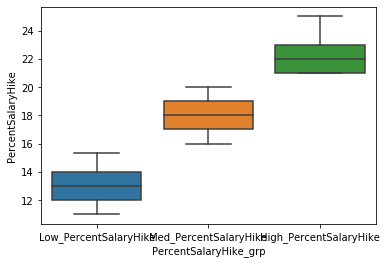

In [204]:
sns.boxplot(x='PercentSalaryHike_grp',y='PercentSalaryHike',data=data)

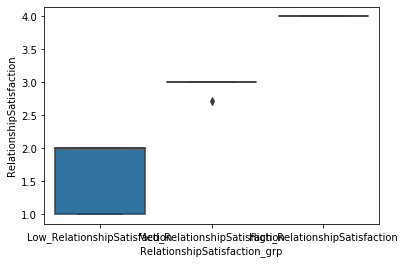

In [246]:
sns.boxplot(x='RelationshipSatisfaction_grp',y='RelationshipSatisfaction',data=data)

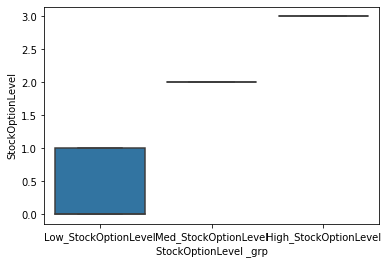

In [206]:
sns.boxplot(x='StockOptionLevel _grp',y='StockOptionLevel',data=data)

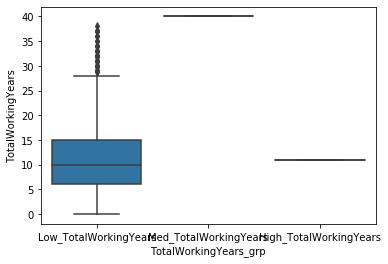

In [247]:
sns.boxplot(x='TotalWorkingYears_grp',y='TotalWorkingYears',data=data)

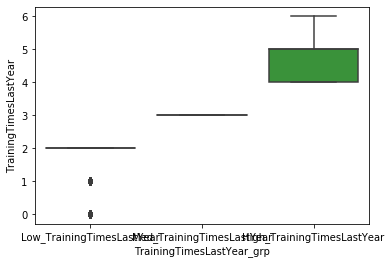

In [208]:
sns.boxplot(x='TrainingTimesLastYear_grp',y='TrainingTimesLastYear',data=data)

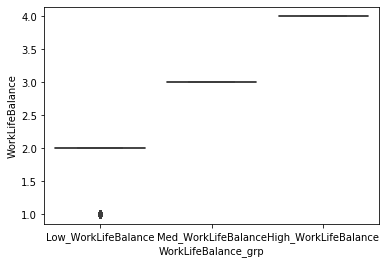

In [209]:
sns.boxplot(x='WorkLifeBalance_grp',y='WorkLifeBalance',data=data)

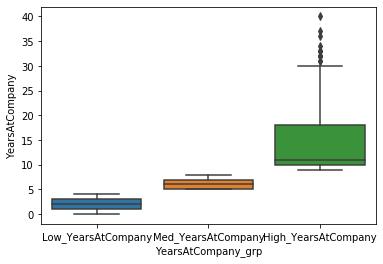

In [210]:
sns.boxplot(x='YearsAtCompany_grp',y='YearsAtCompany',data=data)

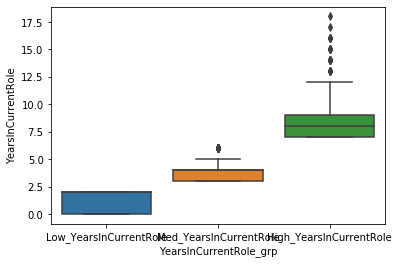

In [211]:
sns.boxplot(x='YearsInCurrentRole_grp',y='YearsInCurrentRole',data=data)

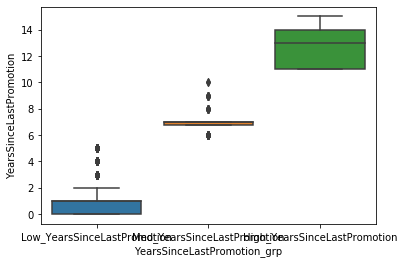

In [212]:
sns.boxplot(x='YearsSinceLastPromotion_grp',y='YearsSinceLastPromotion',data=data)

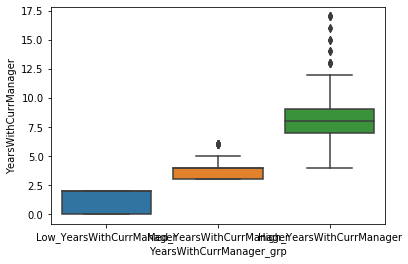

In [232]:
sns.boxplot(x='YearsWithCurrManager_grp',y='YearsWithCurrManager',data=data)

#### Analysis
I can see there are more high age in this company by this chart, most employees are far away from their company. Most employees don't have senior education and they have low environment satisfaction. HourlyRate, MonthlyRate, PercentSalaryHike and MonthlyIncome are very balanced. Most employees don't satisfy their jobs. Most employees only have low stock option level. There are a lof of employees who stay their positions or the company for a lof of years.

### 3.3.3 Data Address

In [69]:
data = data.astype('str')

In [70]:
data[data.columns] = data.apply(lambda x: x.str.strip())

In [71]:
data = data.astype('object')

In [72]:
data2 = data.drop(['Age', 'DailyRate', 'DistanceFromHome', 'Education','EmployeeCount','EmployeeNumber',
                   'EnvironmentSatisfaction','HourlyRate','JobInvolvement','JobLevel','JobSatisfaction',
                   'MonthlyIncome','MonthlyIncome','MonthlyRate','NumCompaniesWorked','Over18','StandardHours',
                   'PercentSalaryHike','RelationshipSatisfaction','PerformanceRating','StockOptionLevel',
                   'TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany',
                   'YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager'],axis=1)

In [73]:
data2.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Age_grp,DailyRate_grp,DistanceFromHome_grp,Education_grp,EnvironmentSatisfaction_grp,HourlyRate_grp,JobInvolvement_grp,JobLevel_grp,JobSatisfaction_grp,MonthlyIncome_grp,MonthlyRate_grp,NumCompaniesWorked_grp,PercentSalaryHike_grp,RelationshipSatisfaction_grp,StockOptionLevel _grp,TotalWorkingYears_grp,TrainingTimesLastYear_grp,WorkLifeBalance_grp,YearsAtCompany_grp,YearsInCurrentRole_grp,YearsSinceLastPromotion_grp,YearsWithCurrManager_grp
0,No,Travel_Rarely,Sales,Life Sciences,Male,Sales Executive,Married,No,Low_Age,High_DailyRate,High_Dis,Low_Edu,High_EnvironmentSatisfaction,High_HourlyRate,Med_JobInvolvement,Low_JobLevel,Med_JobSatisfaction,Low_MonthlyIncome,Low_MonthlyRate,High_JNumCompaniesWorked,Low_PercentSalaryHike,Med_RelationshipSatisfaction,Med_StockOptionLevel,Low_TotalWorkingYears,Low_TrainingTimesLastYear,Low_WorkLifeBalance,Low_YearsAtCompany,Low_YearsInCurrentRole,Low_YearsSinceLastPromotion,Low_YearsWithCurrManager
1,No,Travel_Rarely,Research & Development,Life Sciences,Female,Laboratory Technician,Married,No,High_Age,High_DailyRate,High_Dis,High_Edu,High_EnvironmentSatisfaction,High_HourlyRate,Med_JobInvolvement,Low_JobLevel,Med_JobSatisfaction,Low_MonthlyIncome,High_MonthlyRate,High_JNumCompaniesWorked,Med_PercentSalaryHike,Low_RelationshipSatisfaction,Low_StockOptionLevel,Low_TotalWorkingYears,Med_TrainingTimesLastYear,Med_WorkLifeBalance,Med_YearsAtCompany,Low_YearsInCurrentRole,Low_YearsSinceLastPromotion,Med_YearsWithCurrManager
2,No,Travel_Rarely,Sales,Medical,Female,Sales Executive,Single,No,High_Age,Low_DailyRate,High_Dis,Low_Edu,Med_EnvironmentSatisfaction,Med_HourlyRate,Low_JobInvolvement,Low_JobLevel,Med_JobSatisfaction,Low_MonthlyIncome,Low_MonthlyRate,High_JNumCompaniesWorked,Med_PercentSalaryHike,Low_RelationshipSatisfaction,Low_StockOptionLevel,Low_TotalWorkingYears,High_TrainingTimesLastYear,Med_WorkLifeBalance,Med_YearsAtCompany,Med_YearsInCurrentRole,Low_YearsSinceLastPromotion,Med_YearsWithCurrManager
3,No,Non-Travel,Research & Development,Medical,Male,Healthcare Representative,Divorced,Yes,High_Age,Low_DailyRate,Med_Dis,Low_Edu,High_EnvironmentSatisfaction,Low_HourlyRate,Low_JobInvolvement,High_JobLevel,Low_JobSatisfaction,Med_MonthlyIncome,High_MonthlyRate,Low_NumCompaniesWorked,Low_PercentSalaryHike,High_RelationshipSatisfaction,Low_StockOptionLevel,Low_TotalWorkingYears,Med_TrainingTimesLastYear,Med_WorkLifeBalance,High_YearsAtCompany,High_YearsInCurrentRole,High_YearsSinceLastPromotion,Low_YearsWithCurrManager
4,No,Travel_Rarely,Research & Development,Life Sciences,Female,Healthcare Representative,Single,No,Med_Age,Med_DailyRate,High_Dis,Med_Edu,High_EnvironmentSatisfaction,High_HourlyRate,Low_JobInvolvement,Med_JobLevel,Low_JobSatisfaction,Med_MonthlyIncome,High_MonthlyRate,Low_NumCompaniesWorked,Med_PercentSalaryHike,High_RelationshipSatisfaction,Low_StockOptionLevel,Low_TotalWorkingYears,Med_TrainingTimesLastYear,Low_WorkLifeBalance,High_YearsAtCompany,High_YearsInCurrentRole,Low_YearsSinceLastPromotion,Med_YearsWithCurrManager


In [74]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1172 entries, 0 to 1175
Data columns (total 30 columns):
Attrition                       1172 non-null object
BusinessTravel                  1172 non-null object
Department                      1172 non-null object
EducationField                  1172 non-null object
Gender                          1172 non-null object
JobRole                         1172 non-null object
MaritalStatus                   1172 non-null object
OverTime                        1172 non-null object
Age_grp                         1172 non-null object
DailyRate_grp                   1172 non-null object
DistanceFromHome_grp            1172 non-null object
Education_grp                   1172 non-null object
EnvironmentSatisfaction_grp     1172 non-null object
HourlyRate_grp                  1172 non-null object
JobInvolvement_grp              1172 non-null object
JobLevel_grp                    1172 non-null object
JobSatisfaction_grp             1172 non-null

In [75]:
data3 = pd.DataFrame({col: str(col)+'=' for col in data2}, index=data2.index) + data2.astype(str)

In [76]:
data3.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Age_grp,DailyRate_grp,DistanceFromHome_grp,Education_grp,EnvironmentSatisfaction_grp,HourlyRate_grp,JobInvolvement_grp,JobLevel_grp,JobSatisfaction_grp,MonthlyIncome_grp,MonthlyRate_grp,NumCompaniesWorked_grp,PercentSalaryHike_grp,RelationshipSatisfaction_grp,StockOptionLevel _grp,TotalWorkingYears_grp,TrainingTimesLastYear_grp,WorkLifeBalance_grp,YearsAtCompany_grp,YearsInCurrentRole_grp,YearsSinceLastPromotion_grp,YearsWithCurrManager_grp
0,Attrition=No,BusinessTravel=Travel_Rarely,Department=Sales,EducationField=Life Sciences,Gender=Male,JobRole=Sales Executive,MaritalStatus=Married,OverTime=No,Age_grp=Low_Age,DailyRate_grp=High_DailyRate,DistanceFromHome_grp=High_Dis,Education_grp=Low_Edu,EnvironmentSatisfaction_grp=High_EnvironmentSa...,HourlyRate_grp=High_HourlyRate,JobInvolvement_grp=Med_JobInvolvement,JobLevel_grp=Low_JobLevel,JobSatisfaction_grp=Med_JobSatisfaction,MonthlyIncome_grp=Low_MonthlyIncome,MonthlyRate_grp=Low_MonthlyRate,NumCompaniesWorked_grp=High_JNumCompaniesWorked,PercentSalaryHike_grp=Low_PercentSalaryHike,RelationshipSatisfaction_grp=Med_RelationshipS...,StockOptionLevel _grp=Med_StockOptionLevel,TotalWorkingYears_grp=Low_TotalWorkingYears,TrainingTimesLastYear_grp=Low_TrainingTimesLas...,WorkLifeBalance_grp=Low_WorkLifeBalance,YearsAtCompany_grp=Low_YearsAtCompany,YearsInCurrentRole_grp=Low_YearsInCurrentRole,YearsSinceLastPromotion_grp=Low_YearsSinceLast...,YearsWithCurrManager_grp=Low_YearsWithCurrManager
1,Attrition=No,BusinessTravel=Travel_Rarely,Department=Research & Development,EducationField=Life Sciences,Gender=Female,JobRole=Laboratory Technician,MaritalStatus=Married,OverTime=No,Age_grp=High_Age,DailyRate_grp=High_DailyRate,DistanceFromHome_grp=High_Dis,Education_grp=High_Edu,EnvironmentSatisfaction_grp=High_EnvironmentSa...,HourlyRate_grp=High_HourlyRate,JobInvolvement_grp=Med_JobInvolvement,JobLevel_grp=Low_JobLevel,JobSatisfaction_grp=Med_JobSatisfaction,MonthlyIncome_grp=Low_MonthlyIncome,MonthlyRate_grp=High_MonthlyRate,NumCompaniesWorked_grp=High_JNumCompaniesWorked,PercentSalaryHike_grp=Med_PercentSalaryHike,RelationshipSatisfaction_grp=Low_RelationshipS...,StockOptionLevel _grp=Low_StockOptionLevel,TotalWorkingYears_grp=Low_TotalWorkingYears,TrainingTimesLastYear_grp=Med_TrainingTimesLas...,WorkLifeBalance_grp=Med_WorkLifeBalance,YearsAtCompany_grp=Med_YearsAtCompany,YearsInCurrentRole_grp=Low_YearsInCurrentRole,YearsSinceLastPromotion_grp=Low_YearsSinceLast...,YearsWithCurrManager_grp=Med_YearsWithCurrManager
2,Attrition=No,BusinessTravel=Travel_Rarely,Department=Sales,EducationField=Medical,Gender=Female,JobRole=Sales Executive,MaritalStatus=Single,OverTime=No,Age_grp=High_Age,DailyRate_grp=Low_DailyRate,DistanceFromHome_grp=High_Dis,Education_grp=Low_Edu,EnvironmentSatisfaction_grp=Med_EnvironmentSat...,HourlyRate_grp=Med_HourlyRate,JobInvolvement_grp=Low_JobInvolvement,JobLevel_grp=Low_JobLevel,JobSatisfaction_grp=Med_JobSatisfaction,MonthlyIncome_grp=Low_MonthlyIncome,MonthlyRate_grp=Low_MonthlyRate,NumCompaniesWorked_grp=High_JNumCompaniesWorked,PercentSalaryHike_grp=Med_PercentSalaryHike,RelationshipSatisfaction_grp=Low_RelationshipS...,StockOptionLevel _grp=Low_StockOptionLevel,TotalWorkingYears_grp=Low_TotalWorkingYears,TrainingTimesLastYear_grp=High_TrainingTimesLa...,WorkLifeBalance_grp=Med_WorkLifeBalance,YearsAtCompany_grp=Med_YearsAtCompany,YearsInCurrentRole_grp=Med_YearsInCurrentRole,YearsSinceLastPromotion_grp=Low_YearsSinceLast...,YearsWithCurrManager_grp=Med_YearsWithCurrManager
3,Attrition=No,BusinessTravel=Non-Travel,Department=Research & Development,EducationField=Medical,Gender=Male,JobRole=Healthcare Representative,MaritalStatus=Divorced,OverTime=Yes,Age_grp=High_Age,DailyRate_grp=Low_DailyRate,DistanceFromHome_grp=Med_Dis,Education_grp=Low_Edu,EnvironmentSatisfaction_grp=High_EnvironmentSa...,HourlyRate_grp=Low_HourlyRate,JobInvolvement_grp=Low_JobInvolvement,JobLevel_g

In [77]:
melted_data = pd.melt(data3)

In [78]:
melted_data.head()

,variable,value
0,Attrition,Attrition=No
1,Attrition,Attrition=No
2,Attrition,Attrition=No
3,Attrition,Attrition=No
4,Attrition,Attrition=No


In [79]:
frequency = melted_data.groupby(by=['value'])['value'].count().sort_values(ascending=True)

In [80]:
freq_itemset = pd.DataFrame({'item':frequency.index, 'frequency':frequency.values})

In [81]:
freq_itemset

,item,frequency
0,TotalWorkingYears_grp=High_TotalWorkingYears,1
1,TotalWorkingYears_grp=Med_TotalWorkingYears,2
2,EducationField=Human Resources,25
3,JobRole=Human Resources,43
4,YearsSinceLastPromotion_grp=High_YearsSinceLas...,52
...,...,...
91,JobLevel_grp=Low_JobLevel,861
92,StockOptionLevel _grp=Low_StockOptionLevel,979
93,Attrition=No,987
94,YearsSinceLastPromotion_grp=Low_YearsSinceLast...,1008


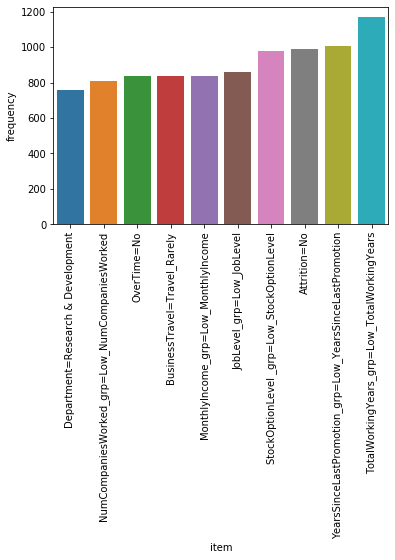

In [82]:
g = sns.barplot(data=freq_itemset.tail(10), x='item', y='frequency')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show()

#### Analysis
Low_TotalWorkingYears is the most， second is Low_YearsSinceLastPromotion

# 4. Data Modeling

In [83]:
records = []
for i in range(0, len(data3)):
    records.append([str(data3.values[i,j]) 
    for j in range(0, len(data3.columns))])
frequent_itemset = ap.apriori(records, min_support=0.8, min_confidence=0.8,
                              min_lift=1,min_length=2)

In [84]:
results = list(frequent_itemset)

In [85]:
len(results)

7

In [86]:
results

[RelationRecord(items=frozenset({'Attrition=No'}), support=0.8421501706484642, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Attrition=No'}), confidence=0.8421501706484642, lift=1.0)]),
 RelationRecord(items=frozenset({'StockOptionLevel _grp=Low_StockOptionLevel'}), support=0.8353242320819113, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'StockOptionLevel _grp=Low_StockOptionLevel'}), confidence=0.8353242320819113, lift=1.0)]),
 RelationRecord(items=frozenset({'TotalWorkingYears_grp=Low_TotalWorkingYears'}), support=0.9974402730375427, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'TotalWorkingYears_grp=Low_TotalWorkingYears'}), confidence=0.9974402730375427, lift=1.0)]),
 RelationRecord(items=frozenset({'YearsSinceLastPromotion_grp=Low_YearsSinceLastPromotion'}), support=0.8600682593856656, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Year

In [87]:
results[1:5]

[RelationRecord(items=frozenset({'StockOptionLevel _grp=Low_StockOptionLevel'}), support=0.8353242320819113, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'StockOptionLevel _grp=Low_StockOptionLevel'}), confidence=0.8353242320819113, lift=1.0)]),
 RelationRecord(items=frozenset({'TotalWorkingYears_grp=Low_TotalWorkingYears'}), support=0.9974402730375427, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'TotalWorkingYears_grp=Low_TotalWorkingYears'}), confidence=0.9974402730375427, lift=1.0)]),
 RelationRecord(items=frozenset({'YearsSinceLastPromotion_grp=Low_YearsSinceLastPromotion'}), support=0.8600682593856656, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'YearsSinceLastPromotion_grp=Low_YearsSinceLastPromotion'}), confidence=0.8600682593856656, lift=1.0)]),
 RelationRecord(items=frozenset({'Attrition=No', 'TotalWorkingYears_grp=Low_TotalWorkingYears'}), support=0.841296928327645

In [88]:
records

[['Attrition=No',
  'BusinessTravel=Travel_Rarely',
  'Department=Sales',
  'EducationField=Life Sciences',
  'Gender=Male',
  'JobRole=Sales Executive',
  'MaritalStatus=Married',
  'OverTime=No',
  'Age_grp=Low_Age',
  'DailyRate_grp=High_DailyRate',
  'DistanceFromHome_grp=High_Dis',
  'Education_grp=Low_Edu',
  'EnvironmentSatisfaction_grp=High_EnvironmentSatisfaction',
  'HourlyRate_grp=High_HourlyRate',
  'JobInvolvement_grp=Med_JobInvolvement',
  'JobLevel_grp=Low_JobLevel',
  'JobSatisfaction_grp=Med_JobSatisfaction',
  'MonthlyIncome_grp=Low_MonthlyIncome',
  'MonthlyRate_grp=Low_MonthlyRate',
  'NumCompaniesWorked_grp=High_JNumCompaniesWorked',
  'PercentSalaryHike_grp=Low_PercentSalaryHike',
  'RelationshipSatisfaction_grp=Med_RelationshipSatisfaction',
  'StockOptionLevel _grp=Med_StockOptionLevel',
  'TotalWorkingYears_grp=Low_TotalWorkingYears',
  'TrainingTimesLastYear_grp=Low_TrainingTimesLastYear',
  'WorkLifeBalance_grp=Low_WorkLifeBalance',
  'YearsAtCompany_grp=Low_

In [89]:
te = TransactionEncoder()
te_ary = te.fit(records).transform(records)
df = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)
frequent_itemsets.sort_values(by='support',ascending=False).head(10)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()
rules[(rules['lift']>1) & (rules['confidence'] > 0.8)].head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(BusinessTravel=Travel_Rarely),(Attrition=No),0.713311,0.84215,0.611775,0.857656,1.018412,0.011060,1.108928
2,(Department=Research & Development),(Attrition=No),0.649317,0.84215,0.566553,0.872536,1.036081,0.019730,1.238389
5,(JobInvolvement_grp=Med_JobInvolvement),(Attrition=No),0.587884,0.84215,0.504266,0.857765,1.018541,0.009180,1.109781
7,(NumCompaniesWorked_grp=Low_NumCompaniesWorked),(Attrition=No),0.691980,0.84215,0.593003,0.856967,1.017594,0.010253,1.103588
8,(OverTime=No),(Attrition=No),0.712457,0.84215,0.634812,0.891018,1.058027,0.034816,1.448402
10,(PercentSalaryHike_grp=Low_PercentSalaryHike),(Attrition=No),0.611775,0.84215,0.516212,0.843794,1.001951,0.001005,1.010521
12,(Attrition=No),(TotalWorkingYears_grp=Low_TotalWorkingYears),0.842150,0.99744,0.841297,0.998987,1.001551,0.001302,2.526451
13,(TotalWorkingYears_grp=Low_TotalWorkingYears),(Attrition=No),0.997440,0.84215,0.841297,0.843456,1.001551,0.001302,1.008341
14,(WorkLifeBalance_grp=Med_WorkLifeBalance),(Attrition=No),0.624573,0.84215,0.537543,0.860656,1.021974,0.011558,1.132805
18,(BusinessTravel=Travel_Rarely),(TotalWorkingYears_grp=Low_TotalWorkingYears),0.713311,0.99744,0.711604,0.997608,1.000168,0.000119,1.069966


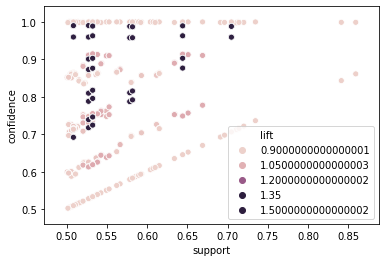

In [90]:
b = sns.scatterplot(data=rules,x='support',y='confidence',hue='lift')
plt.show()

# 5.Data Evaluation

In [91]:
def SupervisedApriori(data,consequent,min_supp,min_conf,min_lift):
    frequent_itemsets = apriori(data, min_supp, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_conf)
    #filter according to lift
    rules = rules[rules['lift'] > min_lift]
    sup_rules = pd.DataFrame()
    for i in consequent:
        df = rules[rules['consequents'] == {i}]
        sup_rules = sup_rules.append(df,ignore_index = True)
    return(sup_rules)  

In [97]:
Attrition_No = SupervisedApriori(df,consequent = ['Attrition=No'],
min_supp=0.4, min_conf=0.7, min_lift=1).sort_values(by='lift',ascending=False).head(5)

In [98]:
Attrition_No

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
53,"(OverTime=No, Department=Research & Developmen...",(Attrition=No),0.461604,0.84215,0.421502,0.913124,1.084277,0.032762,1.816952
19,"(OverTime=No, Department=Research & Development)",(Attrition=No),0.462457,0.84215,0.421502,0.911439,1.082276,0.032043,1.782388
64,"(OverTime=No, NumCompaniesWorked_grp=Low_NumCo...",(Attrition=No),0.487201,0.84215,0.441980,0.907180,1.077219,0.031683,1.700609
29,"(OverTime=No, NumCompaniesWorked_grp=Low_NumCo...",(Attrition=No),0.488055,0.84215,0.441980,0.905594,1.075336,0.030964,1.672039
35,"(WorkLifeBalance_grp=Med_WorkLifeBalance, Over...",(Attrition=No),0.447952,0.84215,0.405290,0.904762,1.074347,0.028047,1.657423


In [122]:
for i in np.linspace(0.1, 0.9, num=9):
    for j in np.linspace(0.1, 0.9, num=9):
        print("support : %f, confidence: %f " %(i,j))
        re = SupervisedApriori(df,consequent = ['Attrition=No'],min_supp=i, min_conf=j, min_lift=1).sort_values(by='lift',ascending=False)
    print(re.head(5))

support : 0.100000, confidence: 0.100000 
support : 0.100000, confidence: 0.200000 
support : 0.100000, confidence: 0.300000 


KeyboardInterrupt: 

In [102]:
Attrition_No['antecedents']

53    (OverTime=No, Department=Research & Developmen...
19     (OverTime=No, Department=Research & Development)
64    (OverTime=No, NumCompaniesWorked_grp=Low_NumCo...
29    (OverTime=No, NumCompaniesWorked_grp=Low_NumCo...
35    (WorkLifeBalance_grp=Med_WorkLifeBalance, Over...
Name: antecedents, dtype: object

In [103]:
Attrition_Yes = SupervisedApriori(df,consequent = ['Attrition=Yes'],
min_supp=0.1, min_conf=0.2, min_lift=1).sort_values(by='lift',ascending=False).head(5)

In [104]:
Attrition_Yes

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YearsInCurrentRole_grp=Low_YearsInCurrentRole),(Attrition=Yes),0.459898,0.15785,0.103242,0.224490,1.422173,0.030648,1.085930
2,(YearsInCurrentRole_grp=Low_YearsInCurrentRole...,(Attrition=Yes),0.459898,0.15785,0.103242,0.224490,1.422173,0.030648,1.085930
4,(YearsSinceLastPromotion_grp=Low_YearsSinceLas...,(Attrition=Yes),0.466724,0.15785,0.100683,0.215722,1.366629,0.027010,1.073791
5,(YearsWithCurrManager_grp=Low_YearsWithCurrMan...,(Attrition=Yes),0.466724,0.15785,0.100683,0.215722,1.366629,0.027010,1.073791
1,(YearsWithCurrManager_grp=Low_YearsWithCurrMan...,(Attrition=Yes),0.478669,0.15785,0.101536,0.212121,1.343817,0.025978,1.068883


In [108]:
Attrition_Yes['antecedents']

0      (YearsInCurrentRole_grp=Low_YearsInCurrentRole)
2    (YearsInCurrentRole_grp=Low_YearsInCurrentRole...
4    (YearsSinceLastPromotion_grp=Low_YearsSinceLas...
5    (YearsWithCurrManager_grp=Low_YearsWithCurrMan...
1    (YearsWithCurrManager_grp=Low_YearsWithCurrMan...
Name: antecedents, dtype: object

In [ ]:
for i in np.linspace(0.1, 0.9, num=9):
    for j in np.linspace(0.1, 0.9, num=9):
        print("support : %f, confidence: %f " %(i,j))
        re = SupervisedApriori(df,consequent = ['Attrition=Yes'],min_supp=i, min_conf=j, min_lift=1).sort_values(by='lift',ascending=False)
    print(re.head(5))

# 6. Data Presentation

Analysis by the above model, we can know 
"No overtime", 
"Research & Development", 
"Low_NumCompaniesWorked",
"Med_WorkLifeBalance" could predict the employees who will stay the company. "Low_YearsInCurrentRole", "Low_YearsSinceLastPromotion", "Low_YearsWithCurrManager" could predict the employees who will leave this company.

[heroku](https://ist707homework-1-heyueyuan.herokuapp.com/)